In [2]:
import numpy as np
import cv2

In [3]:
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

In [4]:
import caffe

In [5]:
import sys
caffe_root = '/home/student/Documents/PSPNet'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

In [6]:
caffe.set_mode_cpu()

In [246]:
model_def = '/home/student/Documents/PSPNet/evaluation/prototxt/pspnet101_cityscapes_713.prototxt'
model_weights = '/home/student/Documents/PSPNet/caffemodel/pspnet101_cityscapes.caffemodel'
# model_def = caffe_root + 'models/DeepLab-LargeFOV/test.prototxt'
# model_weights = caffe_root + 'models/DeepLab-LargeFOV/train2_iter_8000.caffemodel'

In [247]:
net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [248]:
mu = np.load('/home/student/Documents/caffe/python/caffe/imagenet/ilsvrc_2012_mean.npy')
# mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
print 'mean-subtracted values:', zip('BGR', mu)

mean-subtracted values: [('B', 104.0069879317889), ('G', 116.66876761696767), ('R', 122.6789143406786)]


In [249]:
# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR


In [250]:
# set the size of the input (we can skip this if we're happy
#  with the default; we can also change it later, e.g., for different batch sizes)
net.blobs['data'].reshape(1,        # batch size
                          3,         # 3-channel (BGR) images
                          713, 713)  # image size is 227x227

In [251]:
#image = caffe.io.load_image('/home/sumukh/Documents/Living_Indicator/img/file58.png')
# image = caffe.io.load_image('/home/sumukh/Desktop/BMW.jpg')
image = caffe.io.load_image('/home/student/Documents/Living_Indicator/img/file44.png')

/home/student/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


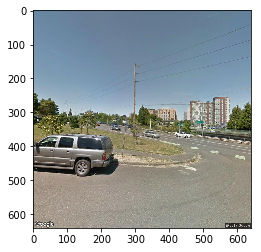

In [252]:
transformed_image = transformer.preprocess('data', image)
plt.imshow(image)

In [253]:
net.blobs['data'].data[...] = transformed_image

In [254]:
output = net.forward()

In [29]:
# for each layer, show the output shape
for layer_name, param in net.params.iteritems():
    # print layer_name + '\t' + str(param[0].data.shape)+ ' ' + str(param[1].data.shape)
    print layer_name + '\t' + str(param[0].data.shape)+ ' '   

conv1_1_3x3_s2	(64, 3, 3, 3) 
conv1_1_3x3_s2/bn	(1, 64, 1, 1) 
conv1_2_3x3	(64, 64, 3, 3) 
conv1_2_3x3/bn	(1, 64, 1, 1) 
conv1_3_3x3	(128, 64, 3, 3) 
conv1_3_3x3/bn	(1, 128, 1, 1) 
conv2_1_1x1_reduce	(64, 128, 1, 1) 
conv2_1_1x1_reduce/bn	(1, 64, 1, 1) 
conv2_1_3x3	(64, 64, 3, 3) 
conv2_1_3x3/bn	(1, 64, 1, 1) 
conv2_1_1x1_increase	(256, 64, 1, 1) 
conv2_1_1x1_increase/bn	(1, 256, 1, 1) 
conv2_1_1x1_proj	(256, 128, 1, 1) 
conv2_1_1x1_proj/bn	(1, 256, 1, 1) 
conv2_2_1x1_reduce	(64, 256, 1, 1) 
conv2_2_1x1_reduce/bn	(1, 64, 1, 1) 
conv2_2_3x3	(64, 64, 3, 3) 
conv2_2_3x3/bn	(1, 64, 1, 1) 
conv2_2_1x1_increase	(256, 64, 1, 1) 
conv2_2_1x1_increase/bn	(1, 256, 1, 1) 
conv2_3_1x1_reduce	(64, 256, 1, 1) 
conv2_3_1x1_reduce/bn	(1, 64, 1, 1) 
conv2_3_3x3	(64, 64, 3, 3) 
conv2_3_3x3/bn	(1, 64, 1, 1) 
conv2_3_1x1_increase	(256, 64, 1, 1) 
conv2_3_1x1_increase/bn	(1, 256, 1, 1) 
conv3_1_1x1_reduce	(128, 256, 1, 1) 
conv3_1_1x1_reduce/bn	(1, 128, 1, 1) 
conv3_1_3x3	(128, 128, 3, 3) 
conv3_1_3x3/bn	(

In [105]:
# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(1, 3, 713, 713)
conv1_1_3x3_s2	(1, 64, 357, 357)
conv1_2_3x3	(1, 64, 357, 357)
conv1_3_3x3	(1, 128, 357, 357)
pool1_3x3_s2	(1, 128, 179, 179)
pool1_3x3_s2_pool1_3x3_s2_0_split_0	(1, 128, 179, 179)
pool1_3x3_s2_pool1_3x3_s2_0_split_1	(1, 128, 179, 179)
conv2_1_1x1_reduce	(1, 64, 179, 179)
conv2_1_3x3	(1, 64, 179, 179)
conv2_1_1x1_increase	(1, 256, 179, 179)
conv2_1_1x1_proj	(1, 256, 179, 179)
conv2_1	(1, 256, 179, 179)
conv2_1_conv2_1/relu_0_split_0	(1, 256, 179, 179)
conv2_1_conv2_1/relu_0_split_1	(1, 256, 179, 179)
conv2_2_1x1_reduce	(1, 64, 179, 179)
conv2_2_3x3	(1, 64, 179, 179)
conv2_2_1x1_increase	(1, 256, 179, 179)
conv2_2	(1, 256, 179, 179)
conv2_2_conv2_2/relu_0_split_0	(1, 256, 179, 179)
conv2_2_conv2_2/relu_0_split_1	(1, 256, 179, 179)
conv2_3_1x1_reduce	(1, 64, 179, 179)
conv2_3_3x3	(1, 64, 179, 179)
conv2_3_1x1_increase	(1, 256, 179, 179)
conv2_3	(1, 256, 179, 179)
conv2_3_conv2_3/relu_0_split_0	(1, 256, 179, 179)
conv2_3_conv2_3/relu_0_split_1	(1, 256, 179, 179)
conv

In [255]:
# print (net.blobs['fc8_voc12'].data[0,1].shape)
print (len(net.blobs['fc8_voc12'].data.flatten()))

KeyError: 'fc8_voc12'

In [150]:
print(net.blobs['conv6_interp'].data[0,4].shape)
print(net.blobs['conv6_interp'].data[0,9])

(713, 713)
[[-2.24593925 -2.25367546 -2.26141191 ..., -1.54700148 -1.53823221
  -1.52946293]
 [-2.29608035 -2.30546498 -2.31484962 ..., -1.56067419 -1.55248153
  -1.54428875]
 [-2.34622169 -2.35725451 -2.36828756 ..., -1.57434702 -1.56673074
  -1.55911469]
 ..., 
 [-0.48331189 -0.47646421 -0.46961653 ...,  4.46427727  4.42944336
   4.3946085 ]
 [-0.46243298 -0.44590834 -0.42938372 ...,  4.39514112  4.34894848
   4.30275536]
 [-0.44155407 -0.41535249 -0.38915092 ...,  4.32600498  4.26845407
   4.21090269]]


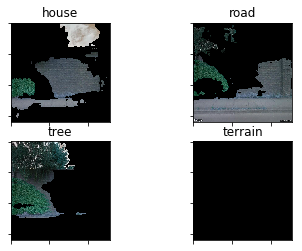

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline


house_img = "/home/student/Sumukh/Results/House/test_house309.png"
road_img = "/home/student/Sumukh/Results/Road/test_road309.png"
tree_img = "/home/student/Sumukh/Results/Trees/test_tree309.png"
terrain_img = "/home/student/Sumukh/Results/Terrain/test_terrain309.png"

img = "/home/student/Sumukh/Living_Indicator/img/file309.png"

img1 = cv2.imread(img)

house = cv2.imread(house_img)
road = cv2.imread(road_img)
tree = cv2.imread(tree_img)
terrain = cv2.imread(terrain_img)
    
pts1 = np.float32([[144, 60], [144, 425], [513, 60], [513, 425]])
pts2 = np.float32([[0, 0], [0, 640], [640, 0], [640, 640]])

M = cv2.getPerspectiveTransform(pts1, pts2)

house= cv2.warpPerspective(house, M, (640, 640))
house = cv2.cvtColor(house, cv2.COLOR_BGR2GRAY)
house_ret, house_mask = cv2.threshold(house, 30, 255, cv2.THRESH_BINARY)
house_bg = cv2.bitwise_and(img1, img1, mask = house_mask)

road= cv2.warpPerspective(road, M, (640, 640))
road = cv2.cvtColor(road, cv2.COLOR_BGR2GRAY)
road_ret, road_mask = cv2.threshold(road, 30, 255, cv2.THRESH_BINARY)
road_bg = cv2.bitwise_and(img1, img1, mask = road_mask)

tree= cv2.warpPerspective(tree, M, (640, 640))
tree = cv2.cvtColor(tree, cv2.COLOR_BGR2GRAY)
tree_ret, tree_mask = cv2.threshold(tree, 30, 255, cv2.THRESH_BINARY)
tree_bg = cv2.bitwise_and(img1, img1, mask = tree_mask)

terrain= cv2.warpPerspective(terrain, M, (640, 640))
terrain = cv2.cvtColor(terrain, cv2.COLOR_BGR2GRAY)
terrain_ret, terrain_mask = cv2.threshold(terrain, 30, 255, cv2.THRESH_BINARY)
terrain_bg = cv2.bitwise_and(img1, img1, mask = terrain_mask)

fig = plt.figure()
a=fig.add_subplot(2,2,1)
plt.imshow(house_bg)
a.set_title('house')
plt.setp(a.get_xticklabels(), visible=False)
plt.setp(a.get_yticklabels(), visible=False)
a=fig.add_subplot(2,2,2)
plt.imshow(road_bg)
a.set_title('road')
plt.setp(a.get_xticklabels(), visible=False)
plt.setp(a.get_yticklabels(), visible=False)
a=fig.add_subplot(2,2,3)
plt.imshow(tree_bg)
a.set_title('tree')
plt.setp(a.get_xticklabels(), visible=False)
plt.setp(a.get_yticklabels(), visible=False)
a=fig.add_subplot(2,2,4)
plt.imshow(terrain_bg)
a.set_title('terrain')
plt.setp(a.get_xticklabels(), visible=False)
plt.setp(a.get_yticklabels(), visible=False)

#plt.savefig('/home/student/Sumukh/forfiles/Seg_309.png')
plt.show()


#plt.savefig('/home/student/Sumukh/forfiles/Seg_6.png')

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

num = "5346"
house_img = "/home/student/Sumukh/Results/House/test_house"+ num + ".png"
road_img = "/home/student/Sumukh/Results/Road/test_road"+ num + ".png"
tree_img = "/home/student/Sumukh/Results/Trees/test_tree"+ num + ".png"
terrain_img = "/home/student/Sumukh/Results/Terrain/test_terrain"+ num + ".png"

img = "/home/student/Sumukh/Living_Indicator/img/file"+ num + ".png"

img1 = cv2.imread(img)

house = cv2.imread(house_img)
road = cv2.imread(road_img)
tree = cv2.imread(tree_img)
terrain = cv2.imread(terrain_img)
    
pts1 = np.float32([[144, 60], [144, 425], [513, 60], [513, 425]])
pts2 = np.float32([[0, 0], [0, 640], [640, 0], [640, 640]])

M = cv2.getPerspectiveTransform(pts1, pts2)

house= cv2.warpPerspective(house, M, (640, 640))
house = cv2.cvtColor(house, cv2.COLOR_BGR2GRAY)
house_ret, house_mask = cv2.threshold(house, 30, 255, cv2.THRESH_BINARY)
house_bg = cv2.bitwise_and(img1, img1, mask = house_mask)

road= cv2.warpPerspective(road, M, (640, 640))
road = cv2.cvtColor(road, cv2.COLOR_BGR2GRAY)
road_ret, road_mask = cv2.threshold(road, 30, 255, cv2.THRESH_BINARY)
road_bg = cv2.bitwise_and(img1, img1, mask = road_mask)

tree= cv2.warpPerspective(tree, M, (640, 640))
tree = cv2.cvtColor(tree, cv2.COLOR_BGR2GRAY)
tree_ret, tree_mask = cv2.threshold(tree, 30, 255, cv2.THRESH_BINARY)
tree_bg = cv2.bitwise_and(img1, img1, mask = tree_mask)

terrain= cv2.warpPerspective(terrain, M, (640, 640))
terrain = cv2.cvtColor(terrain, cv2.COLOR_BGR2GRAY)
terrain_ret, terrain_mask = cv2.threshold(terrain, 30, 255, cv2.THRESH_BINARY)
terrain_bg = cv2.bitwise_and(img1, img1, mask = terrain_mask)


file_house = "/home/student/Desktop/Scores-Ivestigation/Segmented/bad_house_seg_"+ num + ".png"
file_tree = "/home/student/Desktop/Scores-Ivestigation/Segmented/bad_tree_seg_"+ num + ".png"
file_terrain = "/home/student/Desktop/Scores-Ivestigation/Segmented/bad_terrain_seg_"+ num + ".png"
file_road = "/home/student/Desktop/Scores-Ivestigation/Segmented/bad_road_seg_"+ num + ".png"

cv2.imwrite(file_house, house_bg)
cv2.imwrite(file_tree, tree_bg)
cv2.imwrite(file_terrain, terrain_bg)
cv2.imwrite(file_road, road_bg)

'''fig = plt.figure()
a=fig.add_subplot(2,2,1)
plt.imshow(house_bg)
a.set_title('house')
plt.setp(a.get_xticklabels(), visible=False)
plt.setp(a.get_yticklabels(), visible=False)
a=fig.add_subplot(2,2,2)
plt.imshow(road_bg)
a.set_title('road')
plt.setp(a.get_xticklabels(), visible=False)
plt.setp(a.get_yticklabels(), visible=False)
a=fig.add_subplot(2,2,3)
plt.imshow(tree_bg)
a.set_title('tree')
plt.setp(a.get_xticklabels(), visible=False)
plt.setp(a.get_yticklabels(), visible=False)
a=fig.add_subplot(2,2,4)
plt.imshow(terrain_bg)
a.set_title('terrain')
plt.setp(a.get_xticklabels(), visible=False)
plt.setp(a.get_yticklabels(), visible=False)

#plt.savefig('/home/student/Sumukh/forfiles/Seg_309.png')
plt.show() '''


#plt.savefig('/home/student/Sumukh/forfiles/Seg_6.png')

"fig = plt.figure()\na=fig.add_subplot(2,2,1)\nplt.imshow(house_bg)\na.set_title('house')\nplt.setp(a.get_xticklabels(), visible=False)\nplt.setp(a.get_yticklabels(), visible=False)\na=fig.add_subplot(2,2,2)\nplt.imshow(road_bg)\na.set_title('road')\nplt.setp(a.get_xticklabels(), visible=False)\nplt.setp(a.get_yticklabels(), visible=False)\na=fig.add_subplot(2,2,3)\nplt.imshow(tree_bg)\na.set_title('tree')\nplt.setp(a.get_xticklabels(), visible=False)\nplt.setp(a.get_yticklabels(), visible=False)\na=fig.add_subplot(2,2,4)\nplt.imshow(terrain_bg)\na.set_title('terrain')\nplt.setp(a.get_xticklabels(), visible=False)\nplt.setp(a.get_yticklabels(), visible=False)\n\n#plt.savefig('/home/student/Sumukh/forfiles/Seg_309.png')\nplt.show() "

In [84]:
image = cv2.imread('/home/student/Documents/Living_Indicator/img/file44.png')
hist = cv2.calcHist([image], [0], None, [16], [0, 256])
hist1 = cv2.normalize(np.array(hist),  dst=cv2.NORM_MINMAX)
# hist1 =  np.array([0 + ((i - min(hist)) * 1) / (max(hist) - min(hist)) for i in hist])
print(hist1)
print(640*640)
'''fig = plt.figure()
a=fig.add_subplot(1,3,1)
plt.imshow(image[:,:,0])
a=fig.add_subplot(1,3,2)
plt.imshow(image[:,:,1])
a=fig.add_subplot(1,3,3)
plt.imshow(image[:,:,2])'''
print(image[:,:,2].shape)

[[ 0.03608952]
 [ 0.04911968]
 [ 0.05423171]
 [ 0.06357237]
 [ 0.06772306]
 [ 0.08587824]
 [ 0.0809286 ]
 [ 0.21136011]
 [ 0.52201188]
 [ 0.619829  ]
 [ 0.41093722]
 [ 0.29064533]
 [ 0.12231852]
 [ 0.03212721]
 [ 0.00728156]
 [ 0.00654106]]
409600
(640, 640)


In [110]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [111]:
def get_Living_Index(res):
    zestimate = res['zestimate_amount']
    property_size = res['property_size']
    home_size = res['home_size']

    zestimate = zestimate.fillna(np.median(zestimate[np.isnan(zestimate) == False]))
    property_size = property_size.fillna(np.median(property_size[np.isnan(property_size) == False]))
    home_size = home_size.fillna(np.median(home_size[np.isnan(home_size) == False]))

    zestimate = np.array(zestimate)
    property_size = np.array(property_size)
    home_size = np.array(home_size)

    builtin_ratio = property_size / home_size


    # Normalizing zestimate and builtin_ratio for PCA
    zestimate1 = np.array([0 + ((i - min(zestimate)) * 1) / (max(zestimate) - min(zestimate)) for i in zestimate])
    builtin_ratio1 = np.array(
        [0 + ((i - min(builtin_ratio)) * 1) / (max(builtin_ratio) - min(builtin_ratio)) for i in builtin_ratio])

    original_features = np.vstack((zestimate1, builtin_ratio1)).T

    arr_orig_features = np.array(original_features)

    score_pca = PCA(n_components=1)
    score = score_pca.fit_transform(arr_orig_features)

    for i in range(0, len(score)):
        if (score[i] > 0.054): # threshold for zillow_id = 1000000.0, property_size[i] / home_size[i] = 18
            score[i] = 0.054

    finalscore = np.array([0 + ((i - min(score)) * 10) / (max(score) - min(score)) for i in score])

    return finalscore

In [112]:
res = pd.read_csv('/home/student/Sumukh/Living_Indicator/resultset_12000')
living_index = get_Living_Index(res)
y = living_index
seg_feat_house = np.loadtxt("/home/student/Sumukh/Living_Indicator/feat_house.csv", delimiter = ',')
x = seg_feat_house

'''
X_train = x[0:4523]
X_test=  [0:4523]
y_train = y[0:4523]
y_test = y[4523:]


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))'''

'\nX_train = x[0:4523]\nX_test=  [0:4523]\ny_train = y[0:4523]\ny_test = y[4523:]\n\n\nregr = linear_model.LinearRegression()\nregr.fit(X_train, y_train)\n\n# Make predictions using the testing set\ny_pred = regr.predict(X_test)\n\n# The coefficients\nprint(\'Coefficients: \n\', regr.coef_)\n# The mean squared error\nprint("Mean squared error: %.2f"\n      % mean_squared_error(y_test, y_pred))\n# Explained variance score: 1 is perfect prediction\nprint(\'Variance score: %.2f\' % r2_score(y_test, y_pred))'

In [123]:
X_train = x[0:4523]
X_test=  x[4523:]
y_train = y[0:4523]
y_test = y[4523:]

In [124]:
# Linear Regression

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.5f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))
print(regr.score(X_test, y_test))

('Coefficients: \n', array([[  4.20168454e-02,  -1.66197898e-01,  -9.15150826e-01,
         -1.19231725e-01,  -3.96142802e-01,  -4.84598343e-01,
          3.20547860e-01,  -5.01321870e-01,  -4.89562304e-01,
          6.18905825e-01,  -5.84417342e-02,   2.81883792e-01,
          1.00827656e+00,   1.86399639e+00,   1.83838000e+00,
          3.96761029e+00,  -8.37623330e-01,   4.10148752e-01,
          1.39596179e+00,   1.63021086e+00,   4.52935938e-01,
          1.01229714e+00,  -8.89202247e-02,  -3.78370100e-03,
          6.58956331e-02,  -6.69774263e-02,  -3.08268315e-01,
         -4.29385044e-01,  -1.08263157e+00,  -1.84753566e+00,
         -3.00513929e+00,  -6.87844159e+00,  -1.04033829e+00,
          7.32431317e-02,  -6.27654890e-01,  -4.37247800e-01,
         -1.03329448e-01,  -5.89930451e-01,  -7.98072903e-02,
          2.50562448e-02,  -3.21734001e-02,   9.40042076e-03,
          1.88414788e-01,  -1.91264153e-01,   3.67521159e-01,
          4.41666427e-01,   6.24188067e-01,   5.1

In [133]:
print(y_pred[0:10])
print('##################3')
print(y_test[0:10])
print(np.mean(y_pred))
print(np.median(y_pred))
print(max(y_pred))
print(min(y_pred))
print(np.mean(y_test))
print(np.median(y_test))
print(max(y_test))
print(min(y_test))

[[ 3.97527445]
 [ 3.79222694]
 [ 4.1259639 ]
 [ 3.54661404]
 [ 3.89592836]
 [ 3.46471114]
 [ 3.96837245]
 [ 3.88906053]
 [ 3.78854173]
 [ 3.57835389]]
##################3
[[ 3.14849307]
 [ 7.57725206]
 [ 3.28972431]
 [ 1.42342117]
 [ 5.52774787]
 [ 5.1453487 ]
 [ 2.14117729]
 [ 3.01523514]
 [ 1.680946  ]
 [ 3.05704724]]
3.80089788203
3.70209343367
[ 6.96839649]
[ 2.56623621]
3.86504752353
3.28973110967
[ 10.]
[ 0.00186889]


In [142]:
sq_err = np.array([x**2 for x in y_pred - y_test])
print(np.median(sq_err))
print(sum(sq_err) / 1131)

1.32356361375
[ 4.0649305]


In [ ]:
from sklearn.linear_model import BayesianRidge
clf = BayesianRidge(compute_score=True)
clf.fit(X_train, y_train)


In [147]:
# Bayesian Regression

clf = linear_model.BayesianRidge()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Coefficients: \n', clf.coef_)
print("Mean squared error: %.5f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))
print(clf.score(X_test, y_test))

('Coefficients: \n', array([-0.05189905,  0.0516793 , -0.017331  ,  0.19116154, -0.11348458,
       -0.19854876,  0.1770603 , -0.42151018, -0.50292745,  0.21224074,
       -0.26637083, -0.16541609,  0.3672134 ,  0.64373823,  0.14974123,
        0.76188484, -0.07708017,  0.01507131,  0.22839845,  0.43858247,
       -0.06034392,  0.1906088 , -0.27087565, -0.15272739, -0.00172661,
        0.13292196,  0.11026061,  0.15792524, -0.08233508, -0.13829383,
       -0.3474231 ,  0.26515765, -0.12172876, -0.02734289, -0.02051017,
        0.11667445,  0.15713717, -0.13624099,  0.09540689,  0.14431822,
        0.07094242,  0.0734092 ,  0.06556255, -0.3194548 , -0.03098133,
       -0.09590877, -0.28558043,  0.91115019]))
Mean squared error: 4.02605
Variance score: 0.0183
0.0182989141329


In [148]:
print(y[0:10])

[[ 4.33092298]
 [ 1.9165374 ]
 [ 3.3004745 ]
 [ 3.68555112]
 [ 5.77175715]
 [ 3.85494452]
 [ 2.68488545]
 [ 2.64257015]
 [ 1.87833987]
 [ 3.47260684]]


In [150]:
aaa = np.hstack((seg_feat_house,seg_feat_house,seg_feat_house))
aaa.shape

(5654, 144)

In [197]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=500, criterion='mse', max_features=20, max_depth=5, min_samples_split=200, bootstrap=True, oob_score=True, random_state=0)
regr.fit(X_train, y_train)
print(regr.oob_score_)
y_pred = regr.predict(X_test)
sq_err = np.array([x**2 for x in y_pred - y_test])
print(np.median(sq_err))
print(sum(sq_err) / 1131)

/home/student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.0283154029448
1.45527281872
[ 4.18660089  4.1085212   4.10120508 ...,  4.11729235  4.24930898
  4.10169891]


In [239]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes= (70,20), activation='relu', solver='sgd', alpha=0.000001, learning_rate='adaptive', max_iter=500, random_state=0, tol=1e-5)
clf.fit(X_train, y_train) 
print(clf.n_iter_)
y_pred = clf.predict(X_test)
y_pred = y_pred.reshape(1131,1)
sq_err = np.array([x**2 for x in y_pred - y_test])
print(r2_score(y_test, y_pred))
print(np.median(sq_err))
print(sum(sq_err) / 1131)

192
0.0235143364368
1.34177918255
[ 4.00466022]


In [49]:
import numpy as np
np.set_printoptions(threshold='nan')
import cv2

image = cv2.imread('/home/student/Documents/Living_Indicator/img/file44.png')

# divide the image into 196 equal segments and generate histogram and use that as features

win_r = 45
win_c = 45

feat = np.empty(0)

for r in range(0,image.shape[0] - win_r, win_r):
    for c in range(0,image.shape[1] - win_c, win_c):
        window = image[r : r + win_r, c : c + win_c]
        window = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
        hist = cv2.calcHist(window, [0], None, [8], [0, 256])
        hist = cv2.normalize(np.array(hist), dst=cv2.NORM_MINMAX)
        feat = np.append(feat, hist)
        
# feat = cv2.normalize(feat, dst=cv2.NORM_MINMAX)

print(feat.shape[0])

1568


In [55]:
aaa = np.empty(0)
aa = np.append(feat, aaa)
aa = np.append(aa, feat)
aa = aa.reshape(2, 1568)
print(aa)

[[ 0.          0.          0.          0.37637705  0.92646658  0.          0.
   0.          0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0

(640, 640)


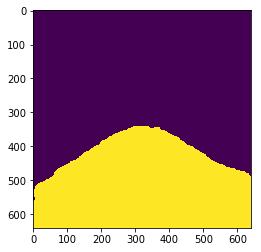

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

im = cv2.imread('/home/student/Sumukh/Results/Road/test_road0.png')
pts1 = np.float32([[144, 60], [144, 425], [513, 60], [513, 425]])
pts2 = np.float32([[0, 0], [0, 640], [640, 0], [640, 640]])

M = cv2.getPerspectiveTransform(pts1, pts2)

road= cv2.warpPerspective(im, M, (640, 640))
road = cv2.cvtColor(road, cv2.COLOR_BGR2GRAY)
road_ret, road_mask = cv2.threshold(road, 30, 255, cv2.THRESH_BINARY)

plt.imshow(road_mask)


In [13]:
#contours = cv2.findContours(road_mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#print((contours[2]))
import cv2
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

img = cv2.imread('/home/student/Sumukh/Living_Indicator/img/file145.png')
#im = cv2.imread('/home/student/Sumukh/Results/Road/test_road2.png')
im = cv2.imread('/home/student/Sumukh/Results/House/test_house145.png')


pts1 = np.float32([[144, 60], [144, 425], [513, 60], [513, 425]])
pts2 = np.float32([[0, 0], [0, 640], [640, 0], [640, 640]])

M = cv2.getPerspectiveTransform(pts1, pts2)

road= cv2.warpPerspective(im, M, (640, 640))
road = cv2.cvtColor(road, cv2.COLOR_BGR2GRAY)
road_ret, road_mask = cv2.threshold(road, 30, 255, cv2.THRESH_BINARY)


cv2.imshow(img,road_mask)


'''x,y,w,h = cv2.boundingRect(road_mask)

pts3 = np.float32([[x, y], [x, y+h], [x+w, y], [x+w, y+h]])
M1 = cv2.getPerspectiveTransform(pts3, pts2)
road = cv2.warpPerspective(img, M1, (640, 640))
print(road.shape)
print(x)
print(y)
print(w)
print(h)
#plt.imshow(road_mask) 
# cv2.rectangle(road_mask,(x,y),(x+20,y+20),(0,255,0),2)
#print(img.shape)
plt.imshow(road) 
#plt.imshow(img) '''

TypeError: expected string or Unicode object, numpy.ndarray found

(640, 640)
0
341
640
299


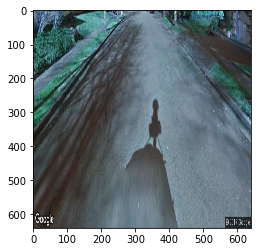

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

import sys
caffe_root = '/home/student/Documents/PSPNet/'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
caffe.set_mode_cpu()

model_def = '/home/student/Documents/caffe/models/bvlc_alexnet/deploy.prototxt'
model_weights = '/home/student/Documents/caffe/models/bvlc_alexnet/bvlc_alexnet.caffemodel'

net = caffe.Net(model_def,  # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)

mu = np.load('/home/student/Documents/caffe/python/caffe/imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2, 0, 1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)  # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)  # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2, 1, 0))  # swap channels from RGB to BGR

pts2 = np.float32([[0, 0], [0, 640], [640, 0], [640, 640]])
pts1 = np.float32([[144, 60], [144, 425], [513, 60], [513, 425]])

M = cv2.getPerspectiveTransform(pts1, pts2)


road_mask = cv2.imread('/home/student/Sumukh/Results/Road/test_road'+ '0' + '.png')
image = cv2.imread('/home/student/Sumukh/Living_Indicator/img/file' + '0'+ '.png')

road_mask= cv2.warpPerspective(road_mask, M, (640, 640))
road_mask = cv2.cvtColor(road_mask, cv2.COLOR_BGR2GRAY)
road_ret, road_mask = cv2.threshold(road_mask, 30, 255, cv2.THRESH_BINARY)

print(road_mask.shape)

road_x,road_y,road_w,road_h = cv2.boundingRect(road_mask)

road_pts = np.float32([[road_x, road_y], [road_x, road_y+road_h], [road_x+road_w, road_y], [road_x+road_w, road_y+road_h]])
road_M = cv2.getPerspectiveTransform(road_pts, pts2)
road = cv2.warpPerspective(image, road_M, (640, 640))

plt.imshow(road) 
print road_x
print road_y
print road_w
print road_h

(640, 640)


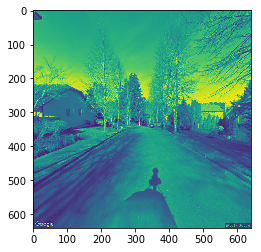

In [12]:
img = "/home/student/Sumukh/Living_Indicator/img/file0.png"
img1 = cv2.imread(img, 0)
print(img1.shape)
plt.imshow(img1)

In [173]:
##################################################
# Code for random augmentated sampling of images #
##################################################

import random
orig_files = ["/home/student/Sumukh/Living_Indicator/img/file" + str(i) + ".png" for i in range(0,5654)]
record = np.empty(0)
count = 0
for img_counter in range(5000, 5655):
    img = cv2.imread(orig_files[img_counter], 0)
    
    xpts =np.array([random.randint(100,540) for p in range(0,30)])
    ypts =np.array([random.randint(100,540) for p in range(0,30)])
    
    coords = np.vstack((xpts,ypts))
    coords = np.transpose(coords)

    subsetcount = 0
    for coord in coords:
        for _ in range(0,3):
            top = random.randint(50,100)
            bottom = random.randint(50,100)
            left = random.randint(50,100)
            right = random.randint(50,100)
            #temp = np.array([coord, np.array([top, right, bottom, left])])
            temp = np.array([coord[0], coord[1], top, right, bottom, left])
            if(count ==0):
                record = temp
                filename = "/home/student/Sumukh/augmented_images/raw/raw_aug_file_"+str(img_counter)+"_"+str(subsetcount)+".png"
                count = count + 1
                subsetcount = subsetcount + 1
            else:
                record = np.vstack((record, temp))
                filename = "/home/student/Sumukh/augmented_images/raw/raw_aug_file_"+str(img_counter)+"_"+str(subsetcount)+".png"
                count = count + 1
                subsetcount = subsetcount + 1
                
            cv2.imwrite(filename, img[(coord[0]-left) : (coord[0]+ right) , (coord[1] - bottom) : (coord[1] + top)])


IndexError: list index out of range

In [174]:
print(record.shape)
np.savetxt("/home/student/Sumukh/Feature_files/raw_aug_samp_feat_5000_5655.csv",record, delimiter = ',', newline = '\n')

(58860, 6)


In [175]:
###########################################################################################################
# Code for random sample augmentation over the bouding box obtained on the images for regions of interest #
###########################################################################################################

import numpy as np
import cv2

count = 0
feat = np.empty(0)

pts2 = np.float32([[0, 0], [0, 640], [640, 0], [640, 640]])
pts1 = np.float32([[144, 60], [144, 425], [513, 60], [513, 425]])

M = cv2.getPerspectiveTransform(pts1, pts2)

# for loop here
for i in range(0, 5654):
    house_mask = cv2.imread('/home/student/Sumukh/Results/House/test_house'+ str(i) + '.png')
    road_mask = cv2.imread('/home/student/Sumukh/Results/Road/test_road'+ str(i) + '.png')
    tree_mask = cv2.imread('/home/student/Sumukh/Results/Trees/test_tree'+ str(i) + '.png')
    terrain_mask = cv2.imread('/home/student/Sumukh/Results/Terrain/test_terrain'+ str(i) + '.png')

    image = cv2.imread('/home/student/Sumukh/Living_Indicator/img/file' + str(i)+ '.png')

    road_mask = cv2.warpPerspective(road_mask, M, (640, 640))
    house_mask = cv2.warpPerspective(house_mask, M, (640, 640))
    tree_mask = cv2.warpPerspective(tree_mask, M, (640, 640))
    terrain_mask = cv2.warpPerspective(terrain_mask, M, (640, 640))

    road_mask = cv2.cvtColor(road_mask, cv2.COLOR_BGR2GRAY)
    house_mask = cv2.cvtColor(house_mask, cv2.COLOR_BGR2GRAY)
    tree_mask = cv2.cvtColor(tree_mask, cv2.COLOR_BGR2GRAY)
    terrain_mask = cv2.cvtColor(terrain_mask, cv2.COLOR_BGR2GRAY)

    _, road_mask = cv2.threshold(road_mask, 30, 255, cv2.THRESH_BINARY)
    _, house_mask = cv2.threshold(house_mask, 30, 255, cv2.THRESH_BINARY)
    _, tree_mask = cv2.threshold(tree_mask, 30, 255, cv2.THRESH_BINARY)
    _, terrain_mask = cv2.threshold(terrain_mask, 30, 255, cv2.THRESH_BINARY)

    road_x,road_y,road_w,road_h = cv2.boundingRect(road_mask)
    house_x,house_y,house_w,house_h = cv2.boundingRect(house_mask)
    tree_x,tree_y,tree_w,tree_h = cv2.boundingRect(tree_mask)
    terrain_x,terrain_y,terrain_w,terrain_h = cv2.boundingRect(terrain_mask)

    road_pts = np.float32([[road_x, road_y], [road_x, road_y+road_h], [road_x+road_w, road_y], [road_x+road_w, road_y+road_h]])
    tree_pts = np.float32([[tree_x, tree_y], [tree_x, tree_y+tree_h], [tree_x+tree_w, tree_y], [tree_x+tree_w, tree_y+tree_h]])
    house_pts = np.float32([[house_x, house_y], [house_x, house_y+house_h], [house_x+house_w, house_y], [house_x+house_w, house_y+house_h]])
    terrain_pts = np.float32([[terrain_x, terrain_y], [terrain_x, terrain_y+terrain_h], [terrain_x+terrain_w, terrain_y], [terrain_x+terrain_w, terrain_y+terrain_h]])

    road_M = cv2.getPerspectiveTransform(road_pts, pts2)
    tree_M = cv2.getPerspectiveTransform(tree_pts, pts2)
    house_M = cv2.getPerspectiveTransform(house_pts, pts2)
    terrain_M = cv2.getPerspectiveTransform(terrain_pts, pts2)

    road = cv2.warpPerspective(image, road_M, (640, 640))
    tree = cv2.warpPerspective(image, tree_M, (640, 640))
    house = cv2.warpPerspective(image, house_M, (640, 640))
    terrain = cv2.warpPerspective(image, terrain_M, (640, 640))

    road_filename = "/home/student/Sumukh/augmented_images/bounding_box/road_bounding_box/bd_box_road_"+str(i)+".png"
    tree_filename = "/home/student/Sumukh/augmented_images/bounding_box/tree_bounding_box/bd_box_tree_"+str(i)+".png"
    house_filename = "/home/student/Sumukh/augmented_images/bounding_box/house_bounding_box/bd_box_house_"+str(i)+".png"
    terrain_filename = "/home/student/Sumukh/augmented_images/bounding_box/terrain_bounding_box/bd_box_terrain_"+str(i)+".png"
    
    cv2.imwrite(road_filename, road)
    cv2.imwrite(tree_filename, tree)
    cv2.imwrite(house_filename, house)
    cv2.imwrite(terrain_filename, terrain)
    
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [37]:
import cv2
import numpy as np
import random
orig_files = ["/home/student/Sumukh/augmented_images/bounding_box/terrain_bounding_box/bd_box_terrain_"+str(i)+".png" for i in range(0,5654)]
record = np.empty(0)
count = 0
for img_counter in range(5000, 5654):
    img = cv2.imread(orig_files[img_counter], 0)
    
    xpts =np.array([random.randint(100,540) for p in range(0,30)])
    ypts =np.array([random.randint(100,540) for p in range(0,30)])
    
    coords = np.vstack((xpts,ypts))
    coords = np.transpose(coords)
    print(img_counter)
    subsetcount = 0
    for coord in coords:
        for _ in range(0,3):
            top = random.randint(50,100)
            bottom = random.randint(50,100)
            left = random.randint(50,100)
            right = random.randint(50,100)
            #temp = np.array([coord, np.array([top, right, bottom, left])])
            temp = np.array([coord[0], coord[1], top, right, bottom, left])
            if(count ==0):
                record = temp
                filename = "/home/student/Sumukh/augmented_images/augmented_terrain/terrain_aug_file_"+str(img_counter)+"_"+str(subsetcount)+".png"
                count = count + 1
                subsetcount = subsetcount + 1
            else:
                record = np.vstack((record, temp))
                filename = "/home/student/Sumukh/augmented_images/augmented_terrain/terrain_aug_file_"+str(img_counter)+"_"+str(subsetcount)+".png"
                count = count + 1
                subsetcount = subsetcount + 1
                
            cv2.imwrite(filename, img[(coord[0]-left) : (coord[0]+ right) , (coord[1] - bottom) : (coord[1] + top)])


5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199


In [38]:
print(record.shape)
#np.savetxt("/home/student/Sumukh/Feature_files/terrain_aug_samp/terrain_aug_samp_coord_5000_5654.csv",record, delimiter = ',', newline = '\n')

(58860, 6)


In [40]:
del(record)
#record = np.loadtxt("/home/student/Sumukh/Feature_files/terrain_aug_samp/terrain_aug_samp_coord_all.csv", delimiter = ',')
#print(record.shape)

(150, 150)


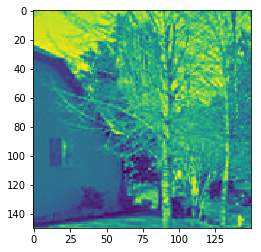

In [56]:
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

fname = "/home/student/Sumukh/augmented_images/raw/raw_aug_file_0_4.png"
img = cv2.imread(fname, 0)
#img.resize(150,150)
img = cv2.resize(img,(150, 150), interpolation = cv2.INTER_CUBIC)
plt.imshow(img)
print(img.shape)    

In [7]:
#############################################################################################
# Code for extracting CNN - Alexnet features from raw- randomly augmented images  - PART -I #
#############################################################################################

import numpy as np
# np.set_printoptions(threshold='nan')
import cv2
import matplotlib.pyplot as plt
# display plots in this notebook
# %matplotlib inline
import sys
caffe_root = '/home/student/Documents/PSPNet/'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
caffe.set_mode_cpu()

filenames = []
for i in range(0, 5654):
    for j in range(0,90):
        name = "/home/student/Sumukh/augmented_images/augmented_terrain/terrain_aug_file_"+str(i)+"_"+str(j)+".png"
        filenames.append(name)

model_def = '/home/student/Documents/caffe/models/bvlc_alexnet/deploy.prototxt'
model_weights = '/home/student/Documents/caffe/models/bvlc_alexnet/bvlc_alexnet.caffemodel'

net = caffe.Net(model_def,  # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)

mu = np.load('/home/student/Documents/caffe/python/caffe/imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2, 0, 1))  # move image channels to outermost dimension
#transformer.set_mean('data', mu)  # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)  # rescale from [0, 1] to [0, 255]
#transformer.set_channel_swap('data', (2, 1, 0))  # swap channels from RGB to BGR

In [8]:
##############################################################################################
# Code for extracting CNN - Alexnet features from raw- randomly augmented images  - PART -II #
##############################################################################################

count = 0
feat = np.empty(0)

for i in range(504000, 508860):#len(filenames)):
    image = caffe.io.load_image(filenames[i])
    transformed_image = transformer.preprocess('data', image)

    net.blobs['data'].data[...] = transformed_image
    output = net.forward()

    temp = net.blobs['fc7'].data[:, :]

    if (count == 0):
        feat = temp
    else:
        feat = np.vstack((feat, temp))

    count = count + 1
    print(count)
    del temp
    
    #if((count % 9000) == 0):
    if((count  == 4860)):       
        csvfile = "/home/student/Sumukh/Feature_files/terrain_cnn_feat/terrain_cnn_feat_" + str((i/90)-100+1) + "_" + str((i/90)+1) + "_.csv"
        np.savetxt(csvfile,feat, delimiter = ',', newline = '\n')
        del(feat)
        feat = np.empty(0)
        count = 0 
        
        #1017112800177865
        

/home/student/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [68]:
print(feat.shape)
np.savetxt("/home/student/Sumukh/Feature_files/raw_cnn_feat/raw_cnn_feat_5583_5654.csv",feat, delimiter = ',', newline = '\n')
#del(feat)

(6390, 4096)
